<a href="https://colab.research.google.com/github/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/ACD_T3_Testes_de_Hipoteses_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Testes de Hipóteses (Lab)

# Caso: **Mais do Mercado de Imóveis de Melbourne** 

**O Mercado de Imóveis de Melbourne ficou "*esfriou*" em 2018, com preços significativamente menores que no ano anterior?** 

Empregue os dados da URL: http://meusite.mackenzie.br/rogerio/TIC/Melbourne_housing_FULL.csv



# **Exercício 0.** Imports e Acesso aos Dados

Aqui você deve **importar as bibliotecas das ferramentas** que você pretende empregar na sua EDA. A seguir você deve fazer a aquisição dos dados. Lembre-se de verificar a origem dos dados para empregar as funções e parâmetros corretos de leitura dos dados (**extensão do arquivo, headers, separador**).




In [ ]:
# imports 
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

In [ ]:
# read data
houses = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Melbourne_housing_FULL.csv')
houses.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# **Exercício 1.** Revistando os Valores Nulos (**RESOLVIDO**)

Antes de seguirmos vamos revisitar o tratamento de valores nulos.

In [ ]:
# visualizando valores nulos
print(houses.isnull().sum()) 

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


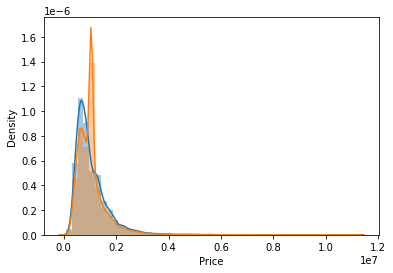

In [ ]:
# Lidando com os valores nulos

pr = pd.DataFrame(houses.Price.dropna()) #Remove missing values.

houses.Price = houses.Price.fillna(houses.Price.mean()) #Replace all NaN elements with mean.

sns.distplot(pr)
sns.distplot(houses.Price);

## Imputando dados com a mesma distribuição

O código aqui é talvez um pouco complexo. Fique a vontade de pular o detalhe do código. Ele não tem maior importância no que segue mas, **concentre-se no conceito e resultado que ele produz**. O mesmo preenchimento é feito para todos os dados nulos.



Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

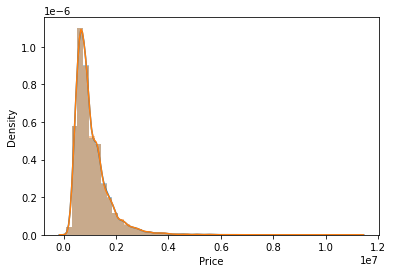

In [ ]:
houses = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Melbourne_housing_FULL.csv')

def filldist(df,col):
    v = pd.DataFrame(df[col].dropna()).reset_index()
    df[col] = df[col].fillna(-1)
    df[col] = df[col].apply(lambda x: (v.iloc[np.random.randint(len(v))][col]) if x==-1 else x)
    return df[col].isnull().sum()

filldist(houses,'Price')

sns.distplot(pr)
sns.distplot(houses.Price)

s = houses.isnull().sum()
for i in s.index:
    if s[i]!=0:
        filldist(houses,i)

houses.isnull().sum()        

De qualquer modo essa estratégia, embora não apresente qualquer distorção na distribuição dos dados, ainda pode introduzir viés na análise dos dados, sendo sempre um risco a introdução artificial dos dados e, tanto maior quanto maior o número de dados introduzidos.

Assim para análise à seguir adotaremos a estratégia de simples exclusão dos dados nulos.  

Vamos então retomar os dados originais para análise e resposta às perguntas do caso.

In [ ]:
houses = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Melbourne_housing_FULL.csv')

houses = houses.dropna()
houses.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


# **Exercício 2.** Qual a média de preços dos imóveis por ano? 

### DICA:
1. Empregue `pd.DatetimeIndex(houses.Date).year` para criar um atributo com o ano.
2. Empregue então `df.groupby(attr).attr.mean()` 


# **Exercício 3.** Verifique, por meio de gráficos, se a distribuição de preços mudou ao longo dos anos. 

### DICA:
1. Empregue `sns.distplot(x)`, sendo x a seleção de dados de Preço para um único ano
2. Você pode fazer `sns.displot()` seguidos para sobrepor os gráficos em uma mesma exibição


In [ ]:
sns.distplot( )
sns.distplot( )
sns.distplot( )
plt.show()

# **Exercício 4.** 
a) Determine a diferença das médias de Preços 2017 e 2018 em %.
\
b) Faça um teste de hipótese para verificar se essa diferença é significativa. Conclua usando o valor-p, use $\alpha=0,05$ 

**DICA:**

Use a função

`t_score, valor_p = stats.ttest_ind(dados1, dados2, equal_var=False)`

onde `dados1` e `dados2` são as amostras de interesse. 



# **Exercício 5.** Teste de Hipóteses

Você quer vender um imóvel em Melbourne e acredita que vendas médias no método 'PI' ('passed in') - digamos, com o uso de um intermediador - não tem qualquer vantagem sobre o método 'S' ('sold') - digamos, venda direta - em termos de preço e que, portanto você estaria perdendo tempo e dinheiro buscando a venda por um intermediário (digamos, corretor). Você estaria correto? 

**DICA**:
Faça um teste de hipótese, sintaxe
\
`t_score, valor_p = stats.ttest_ind( dados1 , dados2 , equal_var)`
em que, `dados1` e `dados2` são os dados cujas médias populacionais você deseja comparar. Conclua usando o valor-p, use $\alpha=0,05$


# Caso: **Udacity, Redução de Cancelamentos pela Alteração do Site**

Vamos verificar de modo bastante resumido o caso real do site **Udacity**. 

**Condição Inicial**. As páginas iniciais do curso Udacity têm duas opções: "iniciar teste gratuito" e "acessar materiais do curso". Clicar em "Iniciar teste gratuito" solicita que o usuário insira as informações do cartão de crédito, subseqüentemente, inscrevendo-as em uma avaliação gratuita de 14 dias do curso, após o que são cobradas automaticamente. Os usuários que clicarem em "acessar materiais do curso" poderão visualizar o conteúdo do curso, mas não receberão suporte de treinamento, certificado verificado ou feedback do projeto.

**Mudança**. A Udacity testou uma mudança na qual os usuários que clicaram em "iniciar a avaliação gratuita" eram questionados sobre quanto tempo estavam dispostos a dedicar ao curso. Os usuários que escolherem 5 ou mais horas por semana serão submetidos ao processo de check-out, como de costume. Para usuários que indicam menos de 5 horas por semana, uma mensagem seria exibida indicando a necessidade de um compromisso maior de tempo para permitir o sucesso no curso e sugerindo para eles acessarem o conteúdo gratuito. Nesse ponto, o aluno teria a opção de continuar se matriculando na avaliação gratuita ou acessar os materiais do curso gratuitamente.

**Ojetivo**. Aumentar a efetividade dos alunos inscritos no teste gratuíto permitindo a empresa focar seus esforços nesses alunos.


**Desenho do Experimento**.

> **Métricas**

>> Invariant Metrics (controle): number of cookies, number of clicks, click-through-probability

>> Evaluation Metrics (objetivo): gross conversion, net conversion

# **Exercício 6.** Aquisição e Preparação dos Dados (**RESOLVIDO**)

Você pode pular os detalhes se quiser e focar na avaliação dos resultados.

In [ ]:
path = 'http://meusite.mackenzie.br/rogerio/TIC/udacity_ABTesting-master/data/'
df_control = pd.read_csv(path + "Control.csv")
df_experiment = pd.read_csv(path+ "Experiment.csv")

df_control.describe() 
df_experiment.describe()

df_control_notnull = df_control[pd.isnull(df_control.Enrollments) != True]
df_experiment_notnull = df_experiment[pd.isnull(df_control.Enrollments) != True]

df_SignTest = pd.merge(df_control_notnull,df_experiment_notnull,on="Date")
df_SignTest['GrossConversion_cont'] = (df_SignTest.Enrollments_x/df_SignTest.Clicks_x)*1000
df_SignTest['GrossConversion_exp'] = (df_SignTest.Enrollments_y/df_SignTest.Clicks_y)*1000
df_SignTest['NetConversion_cont'] = (df_SignTest.Payments_x/df_SignTest.Clicks_x)*1000
df_SignTest['NetConversion_exp'] = (df_SignTest.Payments_y/df_SignTest.Clicks_y)*1000

cols = ['Date','GrossConversion_cont','GrossConversion_exp','NetConversion_cont','NetConversion_exp']

df_SignTest = df_SignTest[cols]
# df_SignTest.describe()

print(df_SignTest)
print('NetConversion controle......: {:.2f} '.format(df_SignTest.NetConversion_cont.mean()))
print('NetConversion experimento...: {:.2f} '.format(df_SignTest.NetConversion_exp.mean()))

print('GrossCoversion controle.....: {:.2f} '.format(df_SignTest.GrossConversion_cont.mean()))
print('GrossConversion experimento.: {:.2f} '.format(df_SignTest.GrossConversion_exp.mean()))



# **Exercício 7.** Teste de Hipóteses

*   As colunas NetConversion_cont e NetConversion_exp informam, respectivamente, o número de `net conversions`, por mil *clicks* no grupo de controle e experimento. Entende-se por *Net conversions* o total de conversões que se tornam clientes potenciais e vendas legítimas. 

*   As colunas GrossConversion_cont e NetConversion_exp informam, respectivamente, o número de `gross conversions`, por mil *clicks* no grupo de controle e experimento. Entende-se por *Gross conversions*  todas as conversões que você obtém. Cada informação de contato, cada preenchimento de formulário e, claro, cada venda online

Verifique, por meio de um teste de hipóteses se há diferença significativa entre as médias de NetConversion e GrossConversion_cont quando comparados os dois grupos, ou seja, avalie se a mundança proposta foi efetiva ou não.

**DICA:** É um teste de duas amostras em que você emprega para cada métrica a variável _cont (controle) e a variável _exp (experimento)

b. Esses dados não estão aqui disponíveis, mas qual seria a utilidade de fazer teste nas métricas consideradas invariantes do experimento e qual o resultado desejado? 



# Caso: **Covid X Temperatura** 

# **Exercício 8.** Empregue o data set abaixo para testar as hipóteses,

Verifique, por meio de um teste de hipóteses, se o número médio de casos confirmados de covid é igual ou não quando consideradas dois grupos: temperaturas inferiores 24 e temperaturas supeiores a 24

> $H_0$: $\mu_{\le24C} =\mu_{>24C}$  

> $H_0$: $\mu_{\le24C} \ne \mu_{>24C}$  

**DICA**: Empregue o valor de temperatura para separar os casos confirmados da doença.

In [ ]:
covid = pd.read_csv('http://meusite.mackenzie.br/rogerio/Corona_Updated.csv')
covid.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Temprature,Humidity,Temp_Cat,Humid_Cat
0,Hubei,Mainland China,2020-03-10T15:13:05,67760,3024,47743,30.9756,112.2707,12.5,86,1,1
1,NaN,Italy,2020-03-10T17:53:02,10149,631,724,43.0000,12.0000,12.9,64,1,1
2,NaN,Iran (Islamic Republic of),2020-03-10T19:13:20,8042,291,2731,32.0000,53.0000,11.9,9,0,0
3,NaN,Republic of Korea,2020-03-10T19:13:20,7513,54,247,36.0000,128.0000,4.9,41,0,0
4,NaN,France,2020-03-10T18:53:02,1784,33,12,47.0000,2.0000,11.9,93,0,0
